Hello! Welcome to my notebook.

First thing: Import libraries and connect to the database

In [85]:
from db import get_db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
db=get_db()

Connected to database: dev


In [64]:
pipeline = [
    {'$match':{'OppAst':{'$ne':np.nan}}},
    {'$group':{'_id':{'TmName':'$TmName','Season':'$Season'},
               'TmPF':{'$sum':'$TmPF'}}},
    {'$sort':{'TmPF':-1}}
]
results = db.games.aggregate(pipeline)
results = list(results)
[print(row) for row in results[0:5]]
[print(row) for row in results[-5:]]



{'_id': {'TmName': 'North Carolina', 'Season': 2008}, 'TmPF': 3016}
{'_id': {'TmName': 'UCLA', 'Season': 2017}, 'TmPF': 2982}
{'_id': {'TmName': 'Villanova', 'Season': 2018}, 'TmPF': 2960}
{'_id': {'TmName': 'North Carolina', 'Season': 2007}, 'TmPF': 2933}
{'_id': {'TmName': 'Kentucky', 'Season': 2017}, 'TmPF': 2922}
{'_id': {'TmName': 'NE Omaha', 'Season': 2012}, 'TmPF': 1103}
{'_id': {'TmName': 'Baylor', 'Season': 2006}, 'TmPF': 1074}
{'_id': {'TmName': 'North Dakota', 'Season': 2009}, 'TmPF': 976}
{'_id': {'TmName': 'South Dakota', 'Season': 2009}, 'TmPF': 950}
{'_id': {'TmName': 'Houston Bap', 'Season': 2008}, 'TmPF': 700}


[None, None, None, None, None]

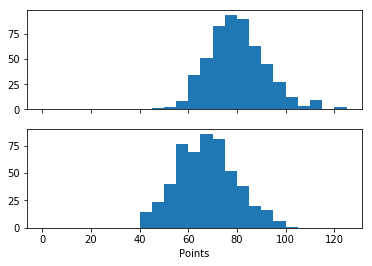

In [129]:
query = {'OppAst':{'$ne':np.nan},
        'TmName':'Duke'
         #,'Season':2018
        }
fields = {'_id':0,
          'TmPF':1,
          'OppPF':1}
results = db.games.find(query,fields)
temp = list(results)
df = pd.DataFrame(temp)
fig, axes = plt.subplots(2, 1,sharex=True)
axes[0].hist(df.TmPF,bins=np.arange(0, 130, 5).tolist(),label='Pts For')
axes[1].set_xlabel('Points')
axes[1].hist(df.OppPF,bins=np.arange(0, 130, 5).tolist(), label = 'Pts Against')
plt.show()